## Project 4:  Solving N-Queens Problem using Genetic Algorithms

#### CSC 180  Intelligent Systems

#### Dr. Haiquan Chen, California State University, Sacramento


In [ ]:
# Insert your name, your id, course title, assignment id, and due date here as comment 

# Rajvee Modi, 219712052, Intelligent Systems, Project 4, 11/20/2020
# Mary Sharlyn Ballesteros, 219750974, Intelligent Systems, Project 4, 11/20/2020
# Perry Gill, 219965110, CSC 180, Project 4 , 11/20/2020










In [ ]:
!pip install deap



```
# This is formatted as code
```


## Part I: Position-index-based board representation

In [ ]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
def create_individual():
    return random.sample(range(64), 8)

In [ ]:
print(create_individual())

[21, 17, 10, 44, 27, 19, 11, 45]


In [ ]:
def show_grid(board):
    
    n = [0]*64
    for i in board:
        n[i] = 1
    
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")


In [ ]:
toolbox = base.Toolbox()

toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
pop = toolbox.population(n=5)

print(pop[0])

[54, 19, 38, 51, 4, 7, 27, 6]


In [ ]:
show_grid(pop[0])

-|-|-|-|X|-|X|X|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|-|X|-|-|X|-|
----------------
-|-|-|-|-|-|-|-|
----------------


### 10 pts:  Write your code in the cell below to define the "evaFitness" function, which returns the fitness of any given board.  

- Noticed that in this case, mutation may generate invalid board, e.g., the board with dupliciate positions.  Think about   [5, 32, 8, 8, 41, 3, 55, 49]

- How to exclude those invalid boards from each generation? One way is to add some penalty to the fitness value of invalid boards.  In that case, any invalid board will have a very high fitness value (remember that our goal is to find the board with least fitness value).    To do that, let's write a function ***checkDuplicate()*** to calculate the number of queen pairs in the same position for any given board.   ***Give each duplicate a high penalty (i.e., multiply by 20, 50) and add the penalty to the fitness value.*** 

-  evaFitness() returns the total number of duplicate position pair (with penalty) plus the total number of distinct pairs of queens that attack each other.  

## EvaFitness function

In [ ]:
#fitness function



def checkIndividuals(q1,q2):
    if (q1 != q2):
        if ( int(q1/8) == int(q2/8)):  #horizontal case
            return True
        elif (int(q1%8) == int(q2%8)):   #vertical cases
            return True
        elif (((int(q1/8) - int((q2/8)))/(q1%8 - q2%8)) == -1):
            return True
        elif (((int(q1/8) - int((q2/8)))/(q1%8 - q2%8)) == 1):
            return True


def evaFitness(individual):
    
    conflict = 0

    for i in range(len(individual)-1):
      for j in range(i+1, len(individual) -1):
          if checkIndividuals(individual[i], individual[j]):
              conflict += 1

    return (checkDuplicate(individual) + conflict,)


    
    

    
    
    
    

    
    
# Calculate the number of queen pairs in the same position for any given board
def checkDuplicate(individual):
  #[2,3,5,2]
    dup = 0
    visited = []
    for number in individual:
      if number in visited:
        dup += 1; 
      else:
        visited.append(number)

    
    
    
    
    return dup

evaFitness(pop[0])


(7,)

### 5 pts:  Writer your code in the cell below to register "evaluate" function to toolbox

In [ ]:
toolbox.register("evaluate", evaFitness)

In [ ]:
toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 63, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

In [ ]:
stats.register("avg", np.mean)
stats.register("min", np.min)

### 10 pts:  Writer your code in the cell below to create the first generation, the hall of fame, and launch the genetic algorithm: eaSimple().   How many individuals you want to have for each generation and how many generations you want GA to go thourgh for each run?     Vary those two parameters to see the change. 

In [ ]:


pop = toolbox.population(n=1000)

hof = tools.HallOfFame(maxsize=1)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)










gen	nevals	avg  	min
0  	1000  	7.961	2  
1  	584   	6.511	1  
2  	639   	5.688	2  
3  	607   	5.141	2  
4  	642   	4.681	1  
5  	635   	4.432	1  
6  	605   	4.138	1  
7  	599   	4.022	1  
8  	580   	3.67 	1  
9  	625   	3.593	1  
10 	597   	3.456	1  
11 	613   	3.314	1  
12 	594   	3.173	0  
13 	589   	3.072	0  
14 	603   	2.966	0  
15 	600   	2.938	0  
16 	558   	2.548	0  
17 	606   	2.65 	0  
18 	610   	2.586	0  
19 	591   	2.33 	0  
20 	604   	2.258	0  
21 	601   	2.048	0  
22 	617   	1.754	0  
23 	601   	1.115	0  
24 	604   	0.603	0  
25 	589   	0.345	0  
26 	575   	0.28 	0  
27 	610   	0.296	0  
28 	577   	0.272	0  
29 	592   	0.322	0  
30 	656   	0.309	0  
31 	596   	0.31 	0  
32 	631   	0.253	0  
33 	599   	0.241	0  
34 	578   	0.253	0  
35 	622   	0.319	0  
36 	617   	0.317	0  
37 	603   	0.266	0  
38 	599   	0.294	0  
39 	630   	0.326	0  
40 	607   	0.278	0  
41 	557   	0.283	0  
42 	630   	0.281	0  
43 	580   	0.242	0  
44 	595   	0.266	0  
45 	614   	0.322	0  
46 	608   	0.

### 5 pts:  Plot the "avg" and "min" for each generation

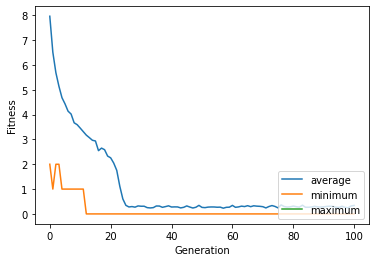

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  


gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")

plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()








### 5 pts:  Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [ ]:





print("Best individual is: ", hof[0])

print("\nwith fitness: ", hof[0].fitness)


show_grid(hof[0])






Best individual is:  [11, 45, 34, 24, 23, 62, 49, 22]

with fitness:  (0.0,)
-|-|-|-|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|-|-|-|-|X|X|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
-|-|-|-|-|X|-|-|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------


## Part II: Row-index-based board representation

In [ ]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Each row of the chess row is indexed from 0->7 . we place different queens on different rows initially.  The sequence [ a b c d .... ] means that in $0^{th}$ row, $a^{th}$ column, the queen is present and so on

In [ ]:
toolbox = base.Toolbox()

toolbox.register("attr_int", random.randint, 0, 7)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, n=8)

In [ ]:
toolbox.individual()

[2, 6, 2, 1, 4, 3, 4, 3]

In [ ]:
def show_grid(board):
    
    n = [0]*64
    
    for i in range(len(board)):
        n[board[i] + i*8] = 1
      
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")


In [ ]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
pop = toolbox.population(n=5)

print(pop[0])

[4, 6, 2, 4, 6, 7, 6, 0]


In [ ]:
show_grid(pop[0])


-|-|-|-|X|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|X|-|-|-|-|-|
----------------
-|-|-|-|X|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|-|-|-|-|-|X|
----------------
-|-|-|-|-|-|X|-|
----------------
X|-|-|-|-|-|-|-|
----------------


### 10 pts:  Write your code in the cell below to define the "evaFitness" function, which return the fitness of any given board

- evaFitness() returns the total number of distinct pairs of queens that attack each other.  

- The following are some test cases you may use to verify the correctness of the evaFitness() function:

 * evaFitness([0, 2, 6, 7, 7, 4, 1, 6]) should return (4,)

 * evaFitness([7, 5, 2, 4, 3, 1, 3, 5]) should return (6,)

 * evaFitness([3, 1, 6, 0, 5, 7, 2, 1]) should return (5,)

 * evaFitness([7, 3, 1, 4, 5, 1, 3, 5]) should return (6,)



In [ ]:
#fitness function
def evaFitness(individual):
    conflict = 0
    for i in range(len(individual)):
      for j in range(i+1, len(individual)):
        if(individual[i] == individual[j]):
            conflict += 1
        elif((((j-i)/(individual[i]-individual[j]))==1)):
            conflict += 1
        elif((j-i)/(individual[i]-individual[j]))==-1:
            conflict += 1

    
    
    return (conflict,)


print(evaFitness([0, 2, 6, 7, 7, 4, 1, 6]))
print(evaFitness([7, 3, 1, 4, 5, 1, 3, 5]))
print(evaFitness([3, 1, 6, 0, 5, 7, 2, 1]))
print(evaFitness([7, 3, 1, 4, 5, 1, 3, 5]))

(4,)
(6,)
(5,)
(6,)


### 5 pts:  Writer your code in the cell below to register "evaluate" function to toolbox

In [ ]:
toolbox.register("evaluate", evaFitness)









In [ ]:

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 7, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)



In [ ]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)


stats.register("avg", np.mean)
stats.register("min", np.min)



### 10 pts:  Writer your code in the cell below to create the first generation, the hall of fame, and launch the genetic algorithm: eaSimple().   How many individuals you want to have for each generation and how many generations you want GA to go thourgh for each run?     Vary those two parameters to see the change. 

In [ ]:

pop = toolbox.population(n=1000)

hof = tools.HallOfFame(maxsize=1)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)












gen	nevals	avg  	min
0  	1000  	7.886	3  
1  	584   	6.335	2  
2  	611   	5.559	1  
3  	651   	5.062	1  
4  	546   	4.522	1  
5  	553   	4.126	1  
6  	608   	3.989	0  
7  	614   	3.758	0  
8  	617   	3.645	0  
9  	626   	3.465	0  
10 	607   	3.325	0  
11 	606   	3.177	0  
12 	564   	3.028	0  
13 	615   	2.997	0  
14 	608   	2.739	0  
15 	612   	2.712	0  
16 	612   	2.582	0  
17 	625   	2.544	0  
18 	616   	2.286	0  
19 	595   	1.781	0  
20 	617   	1.204	0  
21 	609   	0.593	0  
22 	606   	0.269	0  
23 	600   	0.373	0  
24 	575   	0.307	0  
25 	624   	0.266	0  
26 	621   	0.316	0  
27 	590   	0.295	0  
28 	638   	0.257	0  
29 	624   	0.223	0  
30 	587   	0.317	0  
31 	574   	0.27 	0  
32 	626   	0.315	0  
33 	603   	0.346	0  
34 	584   	0.303	0  
35 	593   	0.275	0  
36 	593   	0.298	0  
37 	649   	0.316	0  
38 	595   	0.258	0  
39 	616   	0.308	0  
40 	608   	0.304	0  
41 	544   	0.265	0  
42 	632   	0.272	0  
43 	585   	0.305	0  
44 	609   	0.274	0  
45 	564   	0.328	0  
46 	623   	0.

### 5 pts:  Plot the "avg" and "min" for each generation

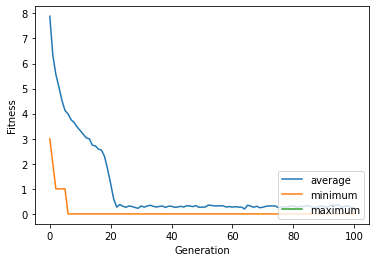

In [ ]:
# Plot the "avg" and "min" for each generation

import matplotlib.pyplot as plt
%matplotlib inline  

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")

plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()








### 5 pts:  Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [ ]:


print("Best individual is: ", hof[0])

print("\nwith fitness: ", hof[0].fitness)


show_grid(hof[0])
















Best individual is:  [2, 4, 1, 7, 0, 6, 3, 5]

with fitness:  (0.0,)
-|-|X|-|-|-|-|-|
----------------
-|-|-|-|X|-|-|-|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|-|-|-|X|-|-|
----------------


### Reflection:  Which board representaion is better in terms of ease of coding and final solution quality?   Try different parameter values for mutation and crossover and vary the number of generations and the population size.  Write your findings in the report.        